In [1]:
# Dependencies
import matplotlib.pyplot as plt
import requests
from scipy import stats
import pandas as pd
from config import api_key

In [2]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

In [3]:
# Get latitude and temperature for cities
cities = ["Paris", "London", "Oslo", "Beijing", "Mumbai", "Manila", "New York", "Seattle", "Dallas", "Taipei"]

# set up lists to hold reponse info
lat = []
temp = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    lat.append(response['coord']['lat'])
    temp.append(response['main']['temp'])

print(f"The latitude information received is: {lat}")
print(f"The temperature information received is: {temp}")

The latitude information received is: [48.8534, 51.5085, 59.9127, 39.9075, 19.0144, 14.6042, 40.7143, 47.6062, 32.7668, 25.0478]
The temperature information received is: [26.62, 22.63, 15.69, 23.94, 27.99, 26.73, 31.23, 27.2, 35.53, 27.62]


In [4]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "city": cities,
    "lat": lat,
    "temp": temp
}
weather_data = pd.DataFrame(weather_dict)
weather_data

,city,lat,temp
0,Paris,48.8534,26.62
1,London,51.5085,22.63
2,Oslo,59.9127,15.69
3,Beijing,39.9075,23.94
4,Mumbai,19.0144,27.99
5,Manila,14.6042,26.73
6,New York,40.7143,31.23
7,Seattle,47.6062,27.20
8,Dallas,32.7668,35.53
9,Taipei,25.0478,27.62


<Axes: xlabel='lat', ylabel='temp'>

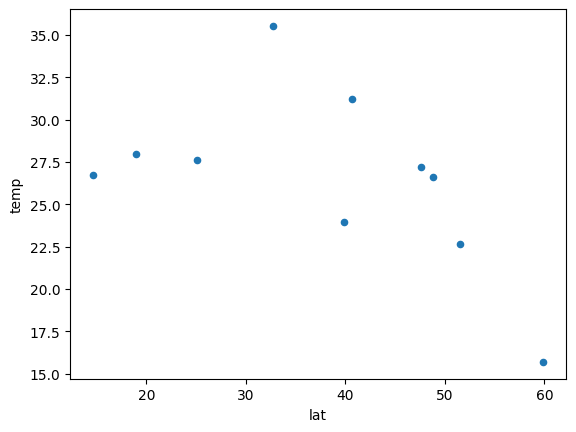

In [7]:
# Create a Scatter Plot for temperature vs. latitude
weather_data.plot(y='temp', x='lat', kind='scatter')

In [9]:
# Perform a linear regression on temperature vs. latitude
res = stats.linregress(x=weather_data['lat'], y=weather_data['temp'])

# Get regression values
print(res)

LinregressResult(slope=np.float64(-0.185536150037621), intercept=np.float64(33.56718255934636), rvalue=np.float64(-0.526909193702843), pvalue=np.float64(0.11760758164132906), stderr=np.float64(0.10580997941188192), intercept_stderr=np.float64(4.287825944068501))


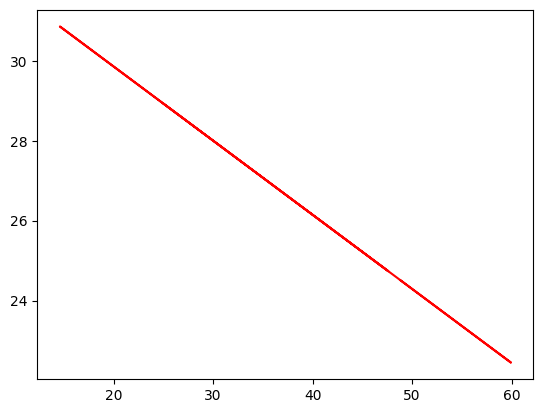

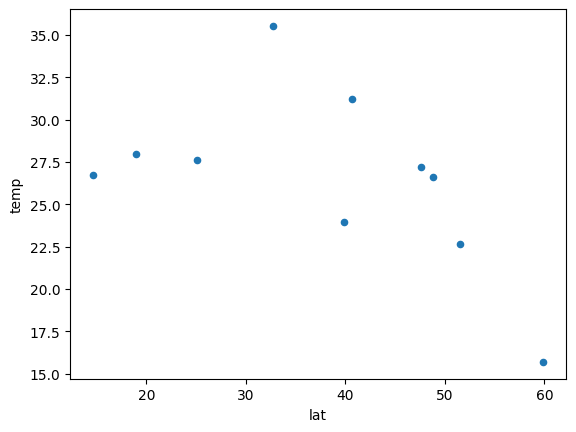

In [13]:
# Create line equation string
plt.plot(weather_data['lat'], res.intercept + res.slope*weather_data['lat'], 'r', label='fitted line')
weather_data.plot(y='temp', x='lat', kind='scatter')
plt.show()


In [ ]:
# Create Plot


# Label plot and annotate the line equation


# Print r square value


# Show plot


In [14]:
# Use the line equation to predict the temperature for Florence at a latitude of 43.77 degrees
res.intercept + res.slope*43.77

np.float64(25.446265272199685)

In [15]:
# Use API to determine actual temperature

response = requests.get(query_url + "Florence").json()

In [17]:
response['main']['temp']

30.85